In [ ]:
import pandas as pd
data = pd.read_csv("EGFR_inhibitors_data.csv")

In [ ]:
data


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,4.1
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,0.6
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,27.7
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,3.2


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='standard_value')

    return x


In [ ]:
data_2 = pIC50(data)
data_2

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,8.131519
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,8.169440
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,8.298301
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,8.481351
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,8.598104
...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,8.076382
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.035182
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.121621
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.070844


In [ ]:
!pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 37.9 MB/s eta 0:00:00


In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)


        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors



In [ ]:
data_2.to_csv("EGFR_inhibitors_analysis.csv")

In [ ]:
df_lipinski = lipinski(data_2.canonical_smiles)
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0
...,...,...,...,...
9789,591.514,5.10290,3.0,9.0
9790,550.505,5.33730,3.0,7.0
9791,548.489,5.09130,3.0,7.0
9792,578.515,5.09990,3.0,8.0


In [ ]:
df_combined = pd.concat([data_2,df_lipinski], axis=1)


In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,8.131519,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,8.169440,482.903,3.61432,3.0,6.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,8.298301,369.432,4.77200,1.0,6.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,8.481351,283.287,2.31056,2.0,4.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,8.598104,164.160,1.49000,2.0,2.0
...,...,...,...,...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,8.076382,591.514,5.10290,3.0,9.0
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.035182,550.505,5.33730,3.0,7.0
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.121621,548.489,5.09130,3.0,7.0
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,8.070844,578.515,5.09990,3.0,8.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

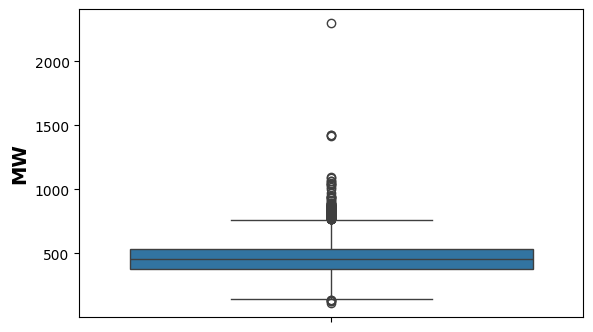

In [ ]:
plt.figure(figsize=(6.5, 4.0))

sns.boxplot(y = 'MW', data = df_combined)


plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

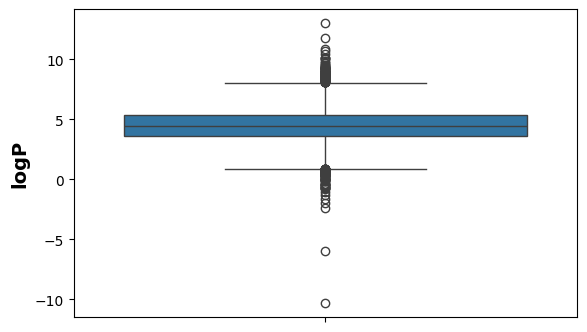

In [ ]:
plt.figure(figsize=(6.5, 4.0))

sns.boxplot(y = 'LogP', data = df_combined)

plt.ylabel('logP', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

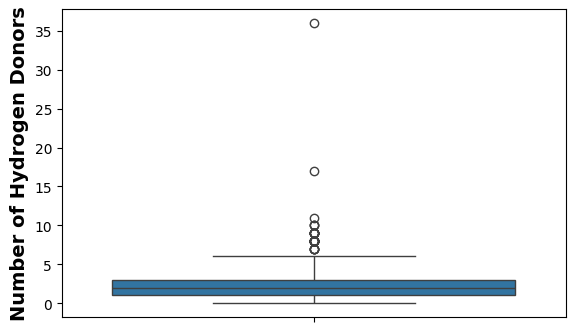

In [ ]:
plt.figure(figsize=(6.5, 4.0))

sns.boxplot(y = 'NumHDonors', data = df_combined)

plt.ylabel('Number of Hydrogen Donors', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

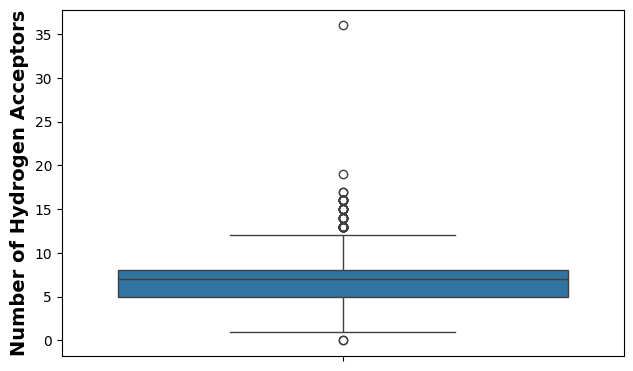

In [ ]:
plt.figure(figsize=(7.25, 4.5))

sns.boxplot(y = 'NumHAcceptors', data = df_combined)

plt.ylabel('Number of Hydrogen Acceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')